<a href="https://colab.research.google.com/github/CakeNuthep/Super_AI/blob/master/Homework/Week4/Class99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.utils import resample, shuffle

In [6]:
df_map = pd.read_csv('https://raw.githubusercontent.com/CakeNuthep/Super_AI/master/Homework/Week4/thai-mnist-classification/mnist.train.map.csv')

In [7]:
df_compete = pd.read_csv('https://raw.githubusercontent.com/CakeNuthep/Super_AI/master/Homework/Week4/thai-mnist-classification/train.rules.csv')

In [8]:
df_compete

,id,feature1,feature2,feature3,predict
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
...,...,...,...,...,...
5550,769b31a2-cb7e-4a89-89d6-efed3199872e,0c754c5d-4166-433e-ac4d-4d1c7ef8e30a.png,bee226cb-6fbf-4470-b2de-d98e5af6110a.png,8801b5ff-821c-477e-9ce7-f65199f75646.png,0
5551,9f603c3a-4475-4d4b-a3ee-e8f868979749,787e9fe5-cb37-4cc5-afbb-20351616ff71.png,90ef2abe-439b-4655-a932-5a8ca5a91b71.png,c39f05cf-17aa-4b7d-afd3-29667f039216.png,51
5552,f25bbfff-6fd9-41f5-b2c2-0059b1a76bc6,a8c56afb-35cf-473a-bcd9-0927f8b6994b.png,7d15bcf1-5141-480c-9265-70a74aa2ed27.png,8f9eba51-8123-4186-8b11-8d2d2d9d134a.png,55
5553,e550dbb5-5127-4828-ac5b-153e9229992e,70ffaa6c-25a1-435a-8413-a8ad26fc8d7d.png,9b2af0fb-f1be-4782-a614-23fa59a366d7.png,ca58239a-7a35-4c96-9b6a-451e112dc5da.png,67


In [16]:
df_map_unique = df_map.drop_duplicates()


In [17]:
df_map_unique

,id,category
0,75606737-d17d-43eb-86e6-6735b6f45a52.png,8
1,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
2,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0
3,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,b8fd3385-9403-48a4-9d9e-74bde635e688.png,9
...,...,...
8250,9b2af0fb-f1be-4782-a614-23fa59a366d7.png,8
8251,ca58239a-7a35-4c96-9b6a-451e112dc5da.png,6
8252,4ec2ba63-0845-4812-a3fa-1f5eda80de8e.png,8
8253,8479e8d8-d592-4931-926c-17a84b02ad0a.png,2


In [10]:
len(df_map['id'].unique())

8255

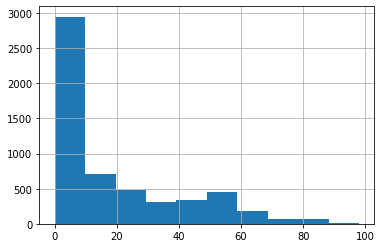

In [18]:
df_compete['predict'].hist()
plt.show()

In [33]:
df_compete.groupby(['predict']).agg(['count'])

,id,feature1,feature2,feature3
,count,count,count,count
predict,,,,
0,645,641,645,645
1,345,334,345,345
2,291,283,291,291
3,319,314,319,319
4,252,239,252,252
...,...,...,...,...
88,8,8,8,8
90,1,1,1,1


# Over Sample

In [20]:
max_size = df_compete['predict'].value_counts().max()

In [23]:
lst = [df_compete]
for class_index, group in df_compete.groupby('predict'):
    lst.append(group.sample(max_size-len(group), replace=True))
df_upsampled = pd.concat(lst)

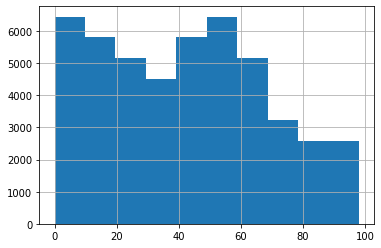

In [25]:
df_upsampled['predict'].hist()
plt.show()

In [31]:
df_upsampled.groupby(['predict']).agg(['count'])

,id,feature1,feature2,feature3
,count,count,count,count
predict,,,,
0,645,641,645,645
1,645,624,645,645
2,645,631,645,645
3,645,637,645,645
4,645,613,645,645
...,...,...,...,...
88,645,645,645,645
90,645,645,645,645


In [34]:
df_upsampled.isna().sum()

id             0
feature1    1487
feature2       0
feature3       0
predict        0
dtype: int64

In [43]:
merg_data = pd.merge(df_upsampled, df_map_unique, left_on='feature1',right_on='id',how='left')
merg_data = pd.merge(merg_data, df_map_unique, left_on='feature2',right_on='id',how='left')
merg_data = pd.merge(merg_data, df_map_unique, left_on='feature3',right_on='id',how='left')

In [51]:
merg_data

,id_x,feature1,feature2,feature3,predict,id_y,category_x,id_x,category_y,id_y,category
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,NaN,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,8,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,NaN,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,8,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,NaN,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,8,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,NaN,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,NaN,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
...,...,...,...,...,...,...,...,...,...,...,...
47725,a561496a-90af-41ba-a064-299d57cb763a,45f1d10e-55c9-4a30-bc6b-ee9a58e2ad7d.png,aebed50b-afe5-48d6-bfc5-10610bb365e5.png,58aa30b0-9381-4754-bbbd-2c848918fb52.png,98,45f1d10e-55c9-4a30-bc6b-ee9a58e2ad7d.png,8.0,aebed50b-afe5-48d6-bfc5-10610bb365e5.png,4,58aa30b0-9381-4754-bbbd-2c848918fb52.png,5
47726,a561496a-90af-41ba-a064-299d57cb763a,45f1d10e-55c9-4a30-bc6b-ee9a58e2ad7d.png,aebed50b-afe5-48d6-bfc5-10610bb365e5.png,58aa30b0-9381-4754-bbbd-2c848918fb52.png,98,45f1d10e-55c9-4a30-bc6b-ee9a58e2ad7d.png,8.0,aebed50b-afe5-48d6-bfc5-10610bb365e5.png,4,58aa30b0-9381-4754-bbbd-2c848918fb52.png,5
47727,1b3f8298-c6c2-439c-b396-10f8e36e2089,24a5e71c-bc34-4adb-8c76-160b2c990989.png,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,0b2ee805-9264-464b-b586-1daec3bb52e9.png,98,24a5e71c-bc34-4adb-8c76-160b2c990989.png,8.0,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,4,0b2ee805-9264-464b-b586-1daec3bb52e9.png,5
47728,1b3f8298-c6c2-439c-b396-10f8e36e2089,24a5e71c-bc34-4adb-8c76-160b2c990989.png,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,0b2ee805-9264-464b-b586-1daec3bb52e9.png,98,24a5e71c-bc34-4adb-8c76-160b2c990989.png,8.0,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,4,0b2ee805-9264-464b-b586-1daec3bb52e9.png,5


In [49]:
df_drop = merg_data.drop(merg_data.columns[[1, 2, 3,5,7,9]],axis=1)

In [50]:
df_drop

,predict,category_x,category_y,category
0,9,NaN,8,1
1,9,NaN,8,1
2,9,NaN,8,1
3,4,NaN,0,4
4,4,NaN,0,4
...,...,...,...,...
47725,98,8.0,4,5
47726,98,8.0,4,5
47727,98,8.0,4,5
47728,98,8.0,4,5


In [ ]:
#df_upsampled.fillna(-)